# Cyber Security-Network Security: Network Intrusions Detection Case-Study

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.feature_selection import RFE,SelectKBest,f_classif
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir(r'C:\Users\Hp\Downloads\12. Capstone Case Study - Cyber Security Case Study\Datasets')

In [3]:
#Importing DataSets!
nor=pd.read_csv('Data_of_Attack_Back_Normal.csv')
back=pd.read_csv('Data_of_Attack_Back.csv')
bb=pd.read_csv('Data_of_Attack_Back_BufferOverflow.csv')
ftp=pd.read_csv('Data_of_Attack_Back_FTPWrite.csv')
gp=pd.read_csv('Data_of_Attack_Back_GuessPassword.csv')
nep=pd.read_csv('Data_of_Attack_Back_Neptune.csv')
nmap=pd.read_csv('Data_of_Attack_Back_NMap.csv')
ps=pd.read_csv('Data_of_Attack_Back_PortSweep.csv')
rk=pd.read_csv('Data_of_Attack_Back_RootKit.csv')
sat=pd.read_csv('Data_of_Attack_Back_Satan.csv')
smu=pd.read_csv('Data_of_Attack_Back_Smurf.csv')

In [4]:
#Changing FTP'S column names as it has different column names!
ftp.columns=['duration', ' protocol_type', ' service', ' flag', ' src_bytes',
       ' dst_bytes', ' land', ' wrong_fragment', ' urgent', ' hot',
       ' num_failed_logins', ' logged_in', ' num_compromised', ' root_shell',
       ' su_attempted', ' num_root', ' num_file_creations', ' num_shells',
       ' num_access_files', ' num_outbound_cmds', ' is_host_login',
       ' is_guest_login', ' count', ' srv_count', ' serror_rate',
       ' srv_error_rate', ' rerror_rate', ' srv_rerror_rate', ' same_srv_rate',
       ' diff_srv_rate', ' srv_diff_host_rate', ' dst_host_count',
       ' dst_host_srv_count', ' dst_host_same_srv_rate',
       ' dst_host_diff_srv_rate', ' dst_host_same_src_port_rate',
       ' dst_host_srv_diff_host_rate', ' dst_host_serror_rate',
       ' dst_host_srv_serror_rate', ' dst_host_rerror_rate',
       ' dst_host_srv_rerror_rate']

In [5]:
#Creating a separate column for the Attack!
nor['Attack']='normal'
back['Attack']='back'
bb['Attack']='back_bufferoverflow'
ftp['Attack']='ftp_write'
gp['Attack']='guess_password'
nep['Attack']='neptune'
nmap['Attack']='nmap'
ps['Attack']='portsweep'
rk['Attack']='rootkit'
sat['Attack']='satan'
smu['Attack']='smurf'

In [6]:
#Appending all the datasets to one DataFrame!
df=nor.append(back).append(bb).append(ftp).append(gp).append(nep).append(nmap).append(ps).append(rk).append(sat).append(smu)
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack
0,0.0,0.00,0.00,0.0,0.00215,0.45076,0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,normal
1,0.0,0.00,0.00,0.0,0.00162,0.04528,0,0.0,0.0,0.0,...,0.001,0.100,0.000,0.100,0.0,0.0,0.0,0.0,0.0,normal
2,0.0,0.00,0.00,0.0,0.00236,0.01228,0,0.0,0.0,0.0,...,0.002,0.100,0.000,0.050,0.0,0.0,0.0,0.0,0.0,normal
3,0.0,0.00,0.00,0.0,0.00233,0.02032,0,0.0,0.0,0.0,...,0.003,0.100,0.000,0.033,0.0,0.0,0.0,0.0,0.0,normal
4,0.0,0.00,0.00,0.0,0.00239,0.00486,0,0.0,0.0,0.0,...,0.004,0.100,0.000,0.025,0.0,0.0,0.0,0.0,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,...,0.251,0.098,0.001,0.098,0.0,0.0,0.0,0.0,0.0,smurf
3003,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,...,0.252,0.099,0.001,0.099,0.0,0.0,0.0,0.0,0.0,smurf
3004,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,...,0.253,0.099,0.001,0.099,0.0,0.0,0.0,0.0,0.0,smurf
3005,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,...,0.254,0.100,0.001,0.100,0.0,0.0,0.0,0.0,0.0,smurf


In [7]:
#Cutting the space in column names with replace function!
df.columns=df.columns.str.replace(' ','')

### EDA

In [8]:
#Checking info!
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817550 entries, 0 to 3006
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     817550 non-null  float64
 1   protocol_type                817550 non-null  float64
 2   service                      817550 non-null  float64
 3   flag                         817550 non-null  float64
 4   src_bytes                    817550 non-null  float64
 5   dst_bytes                    817550 non-null  float64
 6   land                         817550 non-null  int64  
 7   wrong_fragment               817550 non-null  float64
 8   urgent                       817550 non-null  float64
 9   hot                          817550 non-null  float64
 10  num_failed_logins            817550 non-null  float64
 11  logged_in                    817550 non-null  float64
 12  num_compromised              817550 non-null  float64
 13  r

In [9]:
#Checking if any null values are present in any columns!
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_error_rate                 0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [10]:
#Value count of different Attacks!
df.Attack.value_counts()

normal                 576710
neptune                227228
satan                    5019
smurf                    3007
portsweep                2964
nmap                     1554
back                      968
guess_password             53
back_bufferoverflow        30
rootkit                    10
ftp_write                   7
Name: Attack, dtype: int64

In [11]:
# Creating B_Attack for binary classification
dib = {'normal':0,
       'neptune':1,
       'satan':1,
       'smurf':1,
       'portsweep':1,
       'nmap':1,
       'back':1,
       'guess_password':1,
       'back_bufferoverflow':1,
       'rootkit':1,
       'ftp_write':1}

In [12]:
df['B_Attack'] = df.Attack.map(dib)

In [13]:
#Attack Variable dropped as we have b_attack[binary classification of Attack]!
df.drop('Attack',inplace=True,axis=1)

In [14]:
#Value count of B_attack!
df.B_Attack.value_counts()

0    576710
1    240840
Name: B_Attack, dtype: int64

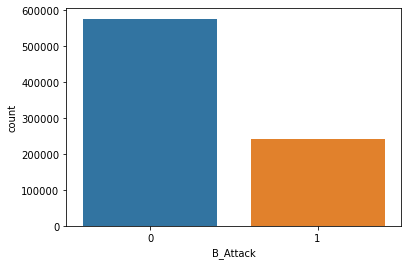

In [15]:
sns.countplot(data = df, x='B_Attack')
plt.show()
#The Countplot shows it is an Imbalanced Data!

In [16]:
pd.set_option('display.max_columns', None)

In [17]:
#Description of DataFrame!
df.describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,B_Attack
count,817550.000000,817550.000000,817550.000000,817550.000000,817550.000000,817550.000000,817550.0,8.175500e+05,817550.000000,817550.000000,817550.000000,817550.000000,817550.000000,817550.000000,817550.000000,817550.000000,817550.000000,817550.000000,817550.000000,817550.0,8.175500e+05,817550.000000,817550.000000,817550.000000,817550.000000,817550.000000,817550.000000,817550.000000,817550.000000,817550.000000,817550.000000,817550.000000,817550.000000,817550.000000,817550.000000,817550.000000,817550.000000,817550.000000,817550.000000,817550.000000,817550.000000,817550.000000
mean,0.000877,0.000570,0.052909,0.020160,0.004961,0.024862,0.0,3.669500e-07,0.000003,0.002456,0.000016,0.063812,0.000275,0.000031,0.000011,0.001463,0.000284,0.000020,0.000360,0.0,1.223167e-07,0.000277,0.059857,0.014078,0.024833,0.024929,0.005355,0.005313,0.073471,0.002939,0.010064,0.166868,0.161652,0.066795,0.003380,0.006148,0.001683,0.024865,0.024852,0.005372,0.005279,0.294587
std,0.026636,0.002596,0.096389,0.030959,0.033235,0.066635,0.0,3.317906e-04,0.000805,0.041469,0.001618,0.048054,0.010338,0.001752,0.001412,0.031777,0.011742,0.001412,0.006565,0.0,1.105969e-04,0.005255,0.091984,0.031403,0.043074,0.043153,0.022330,0.022215,0.041806,0.010127,0.023558,0.102058,0.111642,0.043421,0.008557,0.017459,0.003708,0.043062,0.043151,0.021920,0.022070,0.455857
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.003000,0.003000,0.000000,0.000000,0.000000,0.000000,0.014000,0.000000,0.000000,0.054000,0.017000,0.007000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.002170,0.003670,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.011000,0.008000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.255000,0.255000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.120000,0.070000,0.002990,0.019690,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.106000,0.016000,0.015000,0.017000,0.000000,0.000000,0.100000,0.005000,0.008000,0.255000,0.255000,0.100000,0.006000,0.003000,0.002000,0.014000,0.003000,0.000000,0.000000,1.000000
max,1.000000,0.020000,0.670000,0.100000,1.000000,1.000000,0.0,3.000000e-01,0.500000,1.000000,0.500000,0.100000,1.000000,0.100000,0.200000,1.000000,1.000000,0.200000,0.900000,0.0,1.000000e-01,0.100000,0.511000,0.511000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.255000,0.255000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,1.000000


In [18]:
#Checking if any Duplicates!
df[df.duplicated()]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,B_Attack
2338,0.0,0.02,0.09,0.0,0.00008,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.001,0.001,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.0,1


In [19]:
#Dropping the duplicate!
df.drop_duplicates().B_Attack.value_counts()

0    576710
1    240839
Name: B_Attack, dtype: int64

In [20]:
cols=['duration', ' protocol_type', ' service', ' flag', ' src_bytes',
       ' dst_bytes', ' land', ' wrong_fragment', ' urgent', ' hot',
       ' num_failed_logins', ' logged_in', ' num_compromised', ' root_shell',
       ' su_attempted', ' num_root', ' num_file_creations', ' num_shells',
       ' num_access_files', ' num_outbound_cmds', ' is_host_login',
       ' is_guest_login', ' count', ' srv_count', ' serror_rate',
       ' srv_error_rate', ' rerror_rate', ' srv_rerror_rate', ' same_srv_rate',
       ' diff_srv_rate', ' srv_diff_host_rate', ' dst_host_count',
       ' dst_host_srv_count', ' dst_host_same_srv_rate',
       ' dst_host_diff_srv_rate', ' dst_host_same_src_port_rate',
       ' dst_host_srv_diff_host_rate', ' dst_host_serror_rate',
       ' dst_host_srv_serror_rate', ' dst_host_rerror_rate',
       ' dst_host_srv_rerror_rate', 'B_Attack']

### Feature Engineering

In [21]:
#Separating Nominal and Binary Column Variables!
nomcol = ['protocol_type', 'service', 'flag']
bincol = ['land', 'logged_in', 'root_shell', 'su_attempted', 'is_host_login', 'is_guest_login']

In [22]:
#From column names separating Numerical Variables!
num_var = list(set(cols).difference(set(nomcol).union(set(bincol))).difference(['B_Attack']))

In [23]:
#Creating Dummies for Categorical Varaibles!
df_1=pd.get_dummies(df, columns = nomcol, drop_first = True)
df_1

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,B_Attack,protocol_type_0.01,protocol_type_0.02,service_0.01,service_0.02,service_0.03,service_0.04,service_0.05,service_0.06,service_0.07,service_0.08,service_0.09,service_0.1,service_0.11,service_0.12,service_0.13,service_0.14,service_0.15,service_0.16,service_0.17,service_0.18,service_0.19,service_0.2,service_0.21,service_0.22,service_0.23,service_0.24,service_0.25,service_0.26,service_0.27,service_0.28,service_0.29,service_0.3,service_0.31,service_0.32,service_0.33,service_0.34,service_0.35,service_0.36,service_0.37,service_0.38,service_0.39,service_0.4,service_0.41,service_0.42,service_0.43,service_0.44,service_0.45,service_0.46,service_0.47,service_0.48,service_0.49,service_0.5,service_0.51,service_0.52,service_0.53,service_0.54,service_0.55,service_0.56,service_0.57,service_0.58,service_0.59,service_0.6,service_0.61,service_0.62,service_0.63,service_0.64,service_0.65,service_0.67,flag_0.01,flag_0.02,flag_0.03,flag_0.04,flag_0.05,flag_0.06,flag_0.07,flag_0.08,flag_0.09,flag_0.1
0,0.0,0.00215,0.45076,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,0.00162,0.04528,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.002,0.002,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.001,0.001,0.100,0.000,0.100,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,0.00236,0.01228,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.002,0.002,0.100,0.000,0.050,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.0,0.00233,0.02032,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.002,0.002,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.003,0.003,0.100,0.000,0.033,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.0,0.00239,0.00486,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.003,0.003,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.004,0.004,0.100,0.000,0.025,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002,0.0,0.01032,0.00000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.251,0.251,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.255,0.251,0.098,0.001,0.098,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [24]:
#Outlier Capping!
df_1=df_1.apply(lambda x:x.clip(upper=x.quantile(0.99), lower =x.quantile(0.01)))

In [25]:
#Creating DataFrame for Unique Variables!
a = []
for i in df_1:
    if (len(df_1[i].unique())== 1):
        a.append(i)
        print(i, df_1[i].unique())
        
print(a)

land [0]
wrong_fragment [0.]
urgent [0.]
hot [0.]
num_failed_logins [0.]
num_compromised [0.]
root_shell [0.]
su_attempted [0.]
num_root [0.]
num_file_creations [0.]
num_shells [0.]
num_access_files [0.]
num_outbound_cmds [0]
is_host_login [0.]
is_guest_login [0.]
protocol_type_0.02 [0.]
service_0.03 [0.]
service_0.04 [0.]
service_0.05 [0.]
service_0.06 [0.]
service_0.07 [0.]
service_0.08 [0.]
service_0.09 [0.]
service_0.1 [0.]
service_0.11 [0.]
service_0.13 [0.]
service_0.15 [0.]
service_0.16 [0.]
service_0.17 [0.]
service_0.18 [0.]
service_0.19 [0.]
service_0.2 [0.]
service_0.21 [0.]
service_0.22 [0.]
service_0.23 [0.]
service_0.24 [0.]
service_0.25 [0.]
service_0.26 [0.]
service_0.27 [0.]
service_0.28 [0.]
service_0.29 [0.]
service_0.3 [0.]
service_0.31 [0.]
service_0.32 [0.]
service_0.33 [0.]
service_0.34 [0.]
service_0.35 [0.]
service_0.36 [0.]
service_0.37 [0.]
service_0.38 [0.]
service_0.39 [0.]
service_0.4 [0.]
service_0.41 [0.]
service_0.42 [0.]
service_0.43 [0.]
service_0.44 

In [26]:
#Dropping the Unique column names from dataframe!
df_1.drop(a,inplace=True,axis=1)

In [27]:
df_1

,duration,src_bytes,dst_bytes,logged_in,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,B_Attack,protocol_type_0.01,service_0.01,service_0.02,service_0.12,service_0.14,flag_0.05,flag_0.07
0,0.0,0.00215,0.309345,0.1,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.001,0.001,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
1,0.0,0.00162,0.045280,0.1,0.002,0.002,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.001,0.001,0.100,0.000,0.100,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
2,0.0,0.00236,0.012280,0.1,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.002,0.002,0.100,0.000,0.050,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
3,0.0,0.00233,0.020320,0.1,0.002,0.002,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.003,0.003,0.100,0.000,0.033,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
4,0.0,0.00239,0.004860,0.1,0.003,0.003,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.004,0.004,0.100,0.000,0.025,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002,0.0,0.01032,0.000000,0.0,0.251,0.131,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.255,0.251,0.098,0.001,0.098,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0
3003,0.0,0.01032,0.000000,0.0,0.252,0.131,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.255,0.252,0.099,0.001,0.099,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0
3004,0.0,0.01032,0.000000,0.0,0.253,0.131,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.255,0.253,0.099,0.001,0.099,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0
3005,0.0,0.01032,0.000000,0.0,0.254,0.131,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.255,0.254,0.100,0.001,0.100,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0


In [46]:
#Checking Co-relations of X-Variables with Y-Variable!
cor_values=df_1.corrwith(df_1['B_Attack']).abs().sort_values(ascending = False)

In [47]:
cor_values[cor_values.values>=0.1]

B_Attack                       1.000000
same_srv_rate                  0.965945
dst_host_same_srv_rate         0.902923
dst_host_srv_serror_rate       0.888495
srv_error_rate                 0.887414
dst_host_serror_rate           0.887265
flag_0.07                      0.887162
serror_rate                    0.886825
dst_host_srv_count             0.854154
count                          0.853402
logged_in                      0.852167
service_0.12                   0.827085
dst_host_diff_srv_rate         0.562158
dst_host_count                 0.536986
diff_srv_rate                  0.481580
dst_host_srv_diff_host_rate    0.347538
dst_bytes                      0.293420
srv_diff_host_rate             0.262455
src_bytes                      0.229980
rerror_rate                    0.222727
dst_host_srv_rerror_rate       0.220725
srv_rerror_rate                0.219623
dst_host_rerror_rate           0.218418
flag_0.05                      0.195901
service_0.01                   0.161501


In [48]:
#Univariate Regression!
somerced_val = pd.DataFrame()
for i_var in df_1.columns:
    print(i_var)
    model = smf.logit('B_Attack~'+str(i_var), data=df_1).fit()
    somerce_d = 2*metrics.roc_auc_score(df_1.B_Attack, model.predict())-1
    temp = pd.DataFrame([i_var, somerce_d]).T
    somerced_val = pd.concat([somerced_val, temp], axis=0)

duration
Optimization terminated successfully.
         Current function value: 0.600936
         Iterations 20
src_bytes
Optimization terminated successfully.
         Current function value: 0.367611
         Iterations 10
dst_bytes
Optimization terminated successfully.
         Current function value: 0.302274
         Iterations 13
logged_in
Optimization terminated successfully.
         Current function value: 0.185120
         Iterations 10
count
Optimization terminated successfully.
         Current function value: 0.144324
         Iterations 9
srv_count
Optimization terminated successfully.
         Current function value: 0.605769
         Iterations 5
serror_rate
Optimization terminated successfully.
         Current function value: 0.177418
         Iterations 11
srv_error_rate
Optimization terminated successfully.
         Current function value: 0.177853
         Iterations 10
rerror_rate
Optimization terminated successfully.
         Current function value: 0.584107
    

PerfectSeparationError: Perfect separation detected, results not available

In [49]:
somerced_val.sort_values(by = 1, ascending = False)

,0,1
0,dst_host_same_srv_rate,0.969089
0,same_srv_rate,0.96642
0,dst_host_srv_count,0.960646
0,diff_srv_rate,0.950408
0,src_bytes,0.946741
0,count,0.94515
0,dst_bytes,0.923892
0,dst_host_diff_srv_rate,0.903918
0,logged_in,0.898317
0,dst_host_serror_rate,0.85056


In [50]:
#Selecting Top 15 vars through SomerceD-Values!
imp_var_ur=somerced_val.sort_values(by = 1, ascending = False).head(15)

In [51]:
imp_var_ur = list(imp_var_ur[0].values)

In [52]:
imp_var_ur

['dst_host_same_srv_rate',
 'same_srv_rate',
 'dst_host_srv_count',
 'diff_srv_rate',
 'src_bytes',
 'count',
 'dst_bytes',
 'dst_host_diff_srv_rate',
 'logged_in',
 'dst_host_serror_rate',
 'serror_rate',
 'srv_error_rate',
 'dst_host_srv_serror_rate',
 'dst_host_count',
 'dst_host_srv_diff_host_rate']

### RFE Selection

In [41]:
#Selecting Top 15 Vars through RFE!
rfe_x=df_1[df_1.columns.difference(['B_Attack'])]
rfe_y=df_1.B_Attack

In [42]:
rfe = RFE(estimator = RandomForestClassifier(), n_features_to_select=15).fit(rfe_x,rfe_y)

In [43]:
rfe = rfe.fit(rfe_x,rfe_y)

In [44]:
imp_var_rfe=list(rfe_x.columns[rfe.support_])

### SelectKBest

In [45]:
#Selecting Top 15 Vars through SelectKBest!
SKB = SelectKBest(f_classif, k=15).fit(rfe_x,rfe_y)

In [46]:
SKB.get_support()

array([ True,  True, False,  True,  True, False, False,  True,  True,
        True,  True, False,  True, False, False,  True,  True, False,
       False,  True,  True, False, False,  True, False, False, False,
       False,  True, False])

In [47]:
imp_var_kbest = list(rfe_x.columns[SKB.get_support()])

In [48]:
imp_features=list(set(imp_var_ur + imp_var_kbest + imp_var_rfe))

In [49]:
#Final Vars through Univariate Regression, RFE, SelectKBest!
imp_features

['logged_in',
 'dst_host_same_src_port_rate',
 'srv_error_rate',
 'count',
 'service_0.12',
 'flag_0.07',
 'dst_bytes',
 'dst_host_srv_count',
 'src_bytes',
 'diff_srv_rate',
 'srv_count',
 'dst_host_count',
 'serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_serror_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_srv_rate',
 'same_srv_rate']

In [50]:
#VIF function and selecting Vars whose VIF values is <=5!
feature=imp_features.copy()
a=np.inf
while a>=5:
    vif=[variance_inflation_factor(df_1[feature].values,i) for i in range(df_1[feature].shape[1])]
    vif=pd.Series(vif,name='VIF')
    fet=pd.Series(df_1[feature].columns,name='Feature')
    vifdf=pd.concat([vif,fet],axis=1).sort_values(by="VIF")
    a=vifdf['VIF'].max()
    if a<=5:
        break
    feature=list(vifdf[:-1]["Feature"])
feature

['dst_host_same_src_port_rate',
 'src_bytes',
 'dst_bytes',
 'dst_host_srv_diff_host_rate',
 'diff_srv_rate',
 'srv_count',
 'dst_host_diff_srv_rate',
 'service_0.12',
 'logged_in',
 'count',
 'dst_host_serror_rate']

In [51]:
#Checking VIF values after the VIF function!
vifdf

,VIF,Feature
0,1.291567,dst_host_same_src_port_rate
1,1.335537,src_bytes
2,1.404698,dst_bytes
3,1.494952,dst_host_srv_diff_host_rate
5,1.648939,srv_count
4,1.709745,diff_srv_rate
8,2.323987,logged_in
6,2.347151,dst_host_diff_srv_rate
7,3.338828,service_0.12
10,4.574564,dst_host_serror_rate


### Preparing the Final Dataset for Training

In [29]:
train_x=df_1[feature]

In [30]:
train_x.drop('service_0.12',axis=1,inplace=True)

In [63]:
train_y=rfe_y

In [55]:
train_main=pd.concat([train_x,train_y],axis=1)

### Logistic Regression Model

In [56]:
#Train and Test Split of Final Dataset!
train,test=train_test_split(train_main, test_size=0.2, random_state=123)

In [57]:
fa='B_Attack~dst_host_same_src_port_rate+src_bytes+dst_bytes+dst_host_srv_diff_host_rate+diff_srv_rate+srv_count+dst_host_diff_srv_rate+logged_in+count+dst_host_serror_rate'
fa

'B_Attack~dst_host_same_src_port_rate+src_bytes+dst_bytes+dst_host_srv_diff_host_rate+diff_srv_rate+srv_count+dst_host_diff_srv_rate+logged_in+count+dst_host_serror_rate'

In [58]:
log = smf.logit(formula=fa, data=train)

In [59]:
result = log.fit()

Optimization terminated successfully.
         Current function value: 0.028307
         Iterations 12


In [60]:
#Checking the P-values through Summary Function!
print(result.summary2())

                                 Results: Logit
Model:                    Logit                Pseudo R-squared:     0.953      
Dependent Variable:       B_Attack             AIC:                  37049.4705 
Date:                     2022-11-11 10:57     BIC:                  37174.7706 
No. Observations:         654040               Log-Likelihood:       -18514.    
Df Model:                 10                   LL-Null:              -3.9638e+05
Df Residuals:             654029               LLR p-value:          0.0000     
Converged:                1.0000               Scale:                1.0000     
No. Iterations:           12.0000                                               
--------------------------------------------------------------------------------
                             Coef.   Std.Err.     z     P>|z|   [0.025   0.975] 
--------------------------------------------------------------------------------
Intercept                    -3.8418   0.0363 -105.9244 0.000

In [61]:
#Gini Index of Train and Test!
train_gini = 2*metrics.roc_auc_score(train['B_Attack'], result.predict(train)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(test['B_Attack'], result.predict(test)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)

The Gini Index for the model built on the Train Data is :  0.9980444516153526
The Gini Index for the model built on the Test Data is :  0.9979680017543595


In [62]:
#ROC-AUC Score of Train and Test!
train_auc = metrics.roc_auc_score(train['B_Attack'], result.predict(train))
test_auc = metrics.roc_auc_score(test['B_Attack'], result.predict(test))

print("The AUC for the model built on the Train Data is : ", train_auc)
print("The AUC for the model built on the Test Data is : ", test_auc)

The AUC for the model built on the Train Data is :  0.9990222258076763
The AUC for the model built on the Test Data is :  0.9989840008771798


In [63]:
#Train Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's!
train_predicted_prob = pd.DataFrame(result.predict(train))
train_predicted_prob.columns = ['prob']
train_actual = train['B_Attack']


#Making a DataFrame with actual and prob columns!
train_predict = pd.concat([train_actual, train_predicted_prob], axis=1)
train_predict.columns = ['actual','prob']
train_predict.head()

,actual,prob
165786,1,1.000000
330594,0,0.000562
66227,0,0.000584
123420,0,0.000674
28526,0,0.000339


In [64]:
#Test Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's!
test_predicted_prob = pd.DataFrame(result.predict(test))
test_predicted_prob.columns = ['prob']
test_actual = test['B_Attack']

#Making a DataFrame with actual and prob columns!
test_predict = pd.concat([test_actual, test_predicted_prob], axis=1)
test_predict.columns = ['actual','prob']
test_predict.head()

,actual,prob
142109,0,0.000721
91801,0,0.000412
153622,1,1.000000
223661,1,0.595843
377786,0,0.001564


In [65]:
#Intuition behind ROC curve - confusion matrix for each different cut-off shows trade off in sensitivity and specificity!
roc_like_df = pd.DataFrame()
train_temp = train_predict.copy()

for cut_off in np.linspace(0,1,50):
    train_temp['cut_off'] = cut_off
    train_temp['predicted'] = train_temp['prob'].apply(lambda x: 0.0 if x < cut_off else 1.0)
    train_temp['tp'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['fp'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['tn'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==0 else 0.0, axis=1)
    train_temp['fn'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==0 else 0.0, axis=1)
    sensitivity = train_temp['tp'].sum() / (train_temp['tp'].sum() + train_temp['fn'].sum())
    specificity = train_temp['tn'].sum() / (train_temp['tn'].sum() + train_temp['fp'].sum())
    accuracy = (train_temp['tp'].sum()  + train_temp['tn'].sum() ) / (train_temp['tp'].sum() + train_temp['fn'].sum() + train_temp['tn'].sum() + train_temp['fp'].sum())
    roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity, accuracy]).T
    roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity', 'accuracy']
    roc_like_df = pd.concat([roc_like_df, roc_like_table], axis=0)

In [66]:
roc_like_df

,cutoff,sensitivity,specificity,accuracy
0,0.000000,1.000000,0.000000,0.294399
0,0.020408,0.993721,0.933750,0.951405
0,0.040816,0.991576,0.962175,0.970831
0,0.061224,0.990454,0.969824,0.975897
0,0.081633,0.989717,0.974641,0.979079
0,0.102041,0.989063,0.977256,0.980732
0,0.122449,0.988481,0.978812,0.981659
0,0.142857,0.988076,0.980184,0.982507
0,0.163265,0.987645,0.981460,0.983281
0,0.183673,0.987193,0.982860,0.984136


In [67]:
#Cut-off based on highest accuracy-  some teams use this as methodology to decide the cut-off!
roc_like_df[roc_like_df['accuracy']==roc_like_df['accuracy'].max()]

,cutoff,sensitivity,specificity,accuracy
0,0.489796,0.981548,0.99688,0.992366


In [68]:
#Chosen Best Cut-off is 0.489796 based on highest (sensitivity+specicity)
test_predict['predicted'] = test_predict['prob'].apply(lambda x: 1 if x > 0.489796 else 0)
train_predict['predicted'] = train_predict['prob'].apply(lambda x: 1 if x > 0.489796 else 0)

<AxesSubplot:>

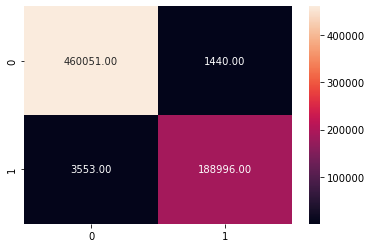

In [69]:
#Plotting Confusion Matrix in SNS Heatmap for Train and Test!
cm=metrics.confusion_matrix(train_predict.actual, train_predict.predicted)
sns.heatmap(cm, annot=True, fmt='.2f')

<AxesSubplot:>

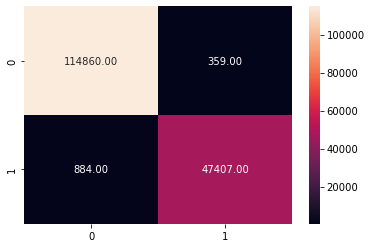

In [70]:
cm_2=metrics.confusion_matrix(test_predict.actual, test_predict.predicted)
sns.heatmap(cm_2, annot=True, fmt='.2f')

In [71]:
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(train_predict.actual, train_predict.predicted))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(test_predict.actual, test_predict.predicted))

The overall accuracy score for the Train Data is :  0.9923659103418752
The overall accuracy score for the Test Data  is :  0.9923980184698183


In [72]:
print(metrics.classification_report(train_predict.actual, train_predict.predicted))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    461491
           1       0.99      0.98      0.99    192549

    accuracy                           0.99    654040
   macro avg       0.99      0.99      0.99    654040
weighted avg       0.99      0.99      0.99    654040



In [73]:
print(metrics.classification_report(test_predict.actual, test_predict.predicted))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    115219
           1       0.99      0.98      0.99     48291

    accuracy                           0.99    163510
   macro avg       0.99      0.99      0.99    163510
weighted avg       0.99      0.99      0.99    163510



### KNN Classifier Model

In [74]:
#Setting up Grid for KNN!
grid = {'n_neighbors':[3,5,7,9,11,13,15,17,18,19,20], 'weights' : ['uniform','distance'] }

In [75]:
#GridSearchCv Function to get Best Params!
knn_model_cv = GridSearchCV(KNeighborsClassifier(),param_grid = grid, cv = 5, scoring='accuracy', verbose=True)

In [76]:
#Separating X and Y for Train and Test Split!
x=train_main[train_main.columns.difference(['B_Attack'])]

In [77]:
y=train_main.B_Attack

In [78]:
train_x, test_x, train_y, test_y=train_test_split(x,y, test_size=0.3, random_state=123)

In [79]:
knn_model_cv.fit(train_x, train_y)

Fitting 5 folds for each of 22 candidates, totalling 110 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 18, 19,
                                         20],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=True)

In [80]:
knn_model_cv.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [81]:
#Setting up Model with Best Params!
knn=KNeighborsClassifier(n_neighbors=3,weights='distance')

In [82]:
#Fitting the Model!
knn.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [83]:
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(train_y, knn.predict(train_x)))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(test_y, knn.predict(test_x)))

The overall accuracy score for the Train Data is :  0.9999667997588614
The overall accuracy score for the Test Data  is :  0.9993884166106048


In [84]:
#ROC-AUC Score for KNN Classifier Model!
print(metrics.roc_auc_score(train_y, pd.DataFrame(knn.predict_proba(train_x))[1]))
print(metrics.roc_auc_score(test_y, pd.DataFrame(knn.predict_proba(test_x))[1]))

0.9999839162106938
0.9996117031944749


In [85]:
print(metrics.classification_report(train_y, knn.predict(train_x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    403861
           1       1.00      1.00      1.00    168424

    accuracy                           1.00    572285
   macro avg       1.00      1.00      1.00    572285
weighted avg       1.00      1.00      1.00    572285



In [86]:
print(metrics.classification_report(test_y, knn.predict(test_x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    172849
           1       1.00      1.00      1.00     72416

    accuracy                           1.00    245265
   macro avg       1.00      1.00      1.00    245265
weighted avg       1.00      1.00      1.00    245265



### AdaBoost Classifier

In [87]:
#Setting up Grid for AdaBoost!
pargrid_ada = {'n_estimators': [100, 200, 400, 600, 800],
               'learning_rate': [10 ** x for x in range(-3, 3)]}

In [88]:
#GridSearchCV to get Best Params!
gscv_ada = GridSearchCV(estimator=AdaBoostClassifier(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)

In [89]:
gscv_ada.fit(train_x, train_y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100],
                         'n_estimators': [100, 200, 400, 600, 800]},
             verbose=True)

In [90]:
gscv_ada.best_params_

{'learning_rate': 1, 'n_estimators': 800}

In [94]:
#Setting up the model with best params!
ada=AdaBoostClassifier(learning_rate = 1, n_estimators=800)

In [95]:
#Fitting the model!
ada.fit(train_x,train_y)

AdaBoostClassifier(learning_rate=1, n_estimators=800)

In [96]:
#ROC-AUC Score for AdaBoost Classifier Model!
print(metrics.roc_auc_score(train_y, pd.DataFrame(ada.predict_proba(train_x))[1]))
print(metrics.roc_auc_score(test_y, pd.DataFrame(ada.predict_proba(test_x))[1]))

0.9999920427827907
0.9999775643320687


In [97]:
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(train_y, ada.predict(train_x)))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(test_y, ada.predict(test_x)))

The overall accuracy score for the Train Data is :  0.999075635391457
The overall accuracy score for the Test Data  is :  0.9990133121317758


In [98]:
print(metrics.classification_report(train_y, ada.predict(train_x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    403861
           1       1.00      1.00      1.00    168424

    accuracy                           1.00    572285
   macro avg       1.00      1.00      1.00    572285
weighted avg       1.00      1.00      1.00    572285



In [99]:
print(metrics.classification_report(test_y, ada.predict(test_x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    172849
           1       1.00      1.00      1.00     72416

    accuracy                           1.00    245265
   macro avg       1.00      1.00      1.00    245265
weighted avg       1.00      1.00      1.00    245265



# Multinomial Classification

In [31]:
#Preparing the DataFrame for Multinomial Classification!
df_m=nor.append(back).append(bb).append(ftp).append(gp).append(nep).append(nmap).append(ps).append(rk).append(sat).append(smu)
df_m

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack
0,0.0,0.00,0.00,0.0,0.00215,0.45076,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,normal
1,0.0,0.00,0.00,0.0,0.00162,0.04528,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.002,0.002,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.001,0.001,0.100,0.000,0.100,0.0,0.0,0.0,0.0,0.0,normal
2,0.0,0.00,0.00,0.0,0.00236,0.01228,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.002,0.002,0.100,0.000,0.050,0.0,0.0,0.0,0.0,0.0,normal
3,0.0,0.00,0.00,0.0,0.00233,0.02032,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.002,0.002,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.003,0.003,0.100,0.000,0.033,0.0,0.0,0.0,0.0,0.0,normal
4,0.0,0.00,0.00,0.0,0.00239,0.00486,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.003,0.003,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.004,0.004,0.100,0.000,0.025,0.0,0.0,0.0,0.0,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.251,0.251,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.255,0.251,0.098,0.001,0.098,0.0,0.0,0.0,0.0,0.0,smurf
3003,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.252,0.252,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.255,0.252,0.099,0.001,0.099,0.0,0.0,0.0,0.0,0.0,smurf
3004,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.253,0.253,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.255,0.253,0.099,0.001,0.099,0.0,0.0,0.0,0.0,0.0,smurf
3005,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.254,0.254,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.255,0.254,0.100,0.001,0.100,0.0,0.0,0.0,0.0,0.0,smurf


In [32]:
#Cutting space in column names with Replace Function!
df_m.columns=df_m.columns.str.replace(' ','')

In [33]:
#Creating M_Attack for Multinomial classification!
dib_1 = {'normal':0,
       'back':1,
       'back_bufferoverflow':2,
       'ftp_write':3,
       'guess_password':4,
       'neptune':5,
       'nmap':6,
       'portsweep':7,
       'rootkit':8,  
       'satan':9,
       'smurf':10,}

In [34]:
#Creating a column for M_Attack!
df_m['M_Attack'] = df_m.Attack.map(dib_1)

In [35]:
#Dropping the Attack variable as we have M_Attack!
df_m.drop('Attack',inplace=True,axis=1)

In [36]:
#Checking value count of M_attack!
df_m.M_Attack.value_counts()

0     576710
5     227228
9       5019
10      3007
7       2964
6       1554
1        968
4         53
2         30
8         10
3          7
Name: M_Attack, dtype: int64

### Simple Logistic Regression Model

In [37]:
col_m=train_x.columns

In [38]:
#Choosing Same variables as chosen for Bianry Classification and separating X and Y!
x=df_m[col_m]

In [39]:
y=df_m.M_Attack

In [40]:
#Train and Test Split for creating Mode!
x_train,x_test, y_train, y_test = train_test_split(x, y ,test_size=0.2, random_state=42)

In [122]:
#Setting up Logistic regression Model!
logreg_m=LogisticRegression()

In [123]:
#Fitting the Model!
logreg_m.fit(x_train,y_train)

LogisticRegression()

In [124]:
#Creating a dataframe for predicted values!
y_train_predicted=logreg_m.predict(x_train)
y_test_predicted=logreg_m.predict(x_test)

<AxesSubplot:xlabel='col_0', ylabel='M_Attack'>

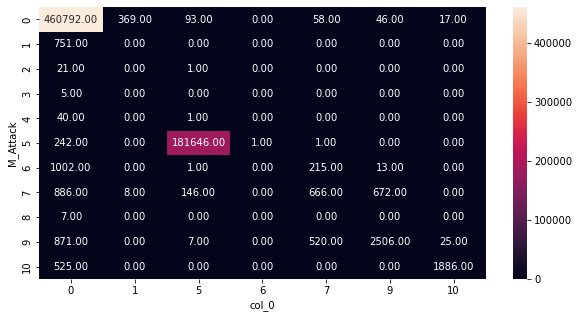

In [125]:
#Creating confusion matrix through SNS Heatmap of actual and predicted values for Train and Test!
plt.figure(figsize=(10,5))
sns.heatmap(pd.crosstab(y_train,y_train_predicted ), annot=True, fmt='.2f')

<AxesSubplot:xlabel='col_0', ylabel='M_Attack'>

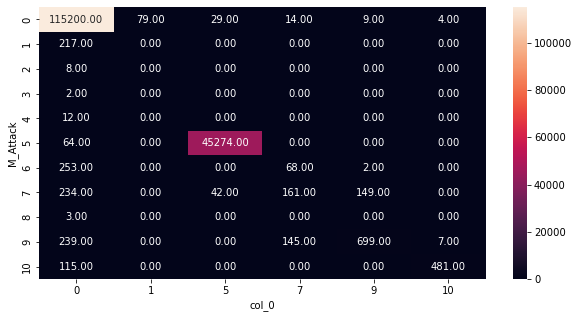

In [126]:
plt.figure(figsize=(10,5))
sns.heatmap(pd.crosstab(y_test,y_test_predicted ), annot=True, fmt='.2f')

In [127]:
print("Accuracy score : ", (metrics.accuracy_score(y_train,y_train_predicted)))
print("Accuracy score : ", (metrics.accuracy_score(y_test,y_test_predicted)))

Accuracy score :  0.9899944957494955
Accuracy score :  0.9896336615497523


In [128]:
print(metrics.classification_report(y_train, y_train_predicted))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    461375
           1       0.00      0.00      0.00       751
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        41
           5       1.00      1.00      1.00    181890
           6       0.00      0.00      0.00      1231
           7       0.46      0.28      0.35      2378
           8       0.00      0.00      0.00         7
           9       0.77      0.64      0.70      3929
          10       0.98      0.78      0.87      2411

    accuracy                           0.99    654040
   macro avg       0.38      0.34      0.36    654040
weighted avg       0.99      0.99      0.99    654040



In [129]:
print(metrics.classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    115335
           1       0.00      0.00      0.00       217
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        12
           5       1.00      1.00      1.00     45338
           6       0.00      0.00      0.00       323
           7       0.41      0.27      0.33       586
           8       0.00      0.00      0.00         3
           9       0.81      0.64      0.72      1090
          10       0.98      0.81      0.88       596

    accuracy                           0.99    163510
   macro avg       0.38      0.34      0.36    163510
weighted avg       0.99      0.99      0.99    163510



### RandomForest Classifier

In [140]:
#Setting up grid!
pargrid_rf = {'n_estimators': [50, 60, 70, 80, 90, 100],'max_features': [2,3,4],'max_depth': [2,3,4,5,6]}

In [141]:
#GridSearchCV to get Best Params for RandomForest Classifier!
gscv_rf = GridSearchCV(estimator=RandomForestClassifier(),param_grid=pargrid_rf,cv=5,
                        verbose=True, n_jobs=-1, scoring='accuracy')

In [142]:
gscv_rf.fit(x_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'max_features': [2, 3, 4],
                         'n_estimators': [50, 60, 70, 80, 90, 100]},
             scoring='accuracy', verbose=True)

In [143]:
gscv_rf.best_params_

{'max_depth': 6, 'max_features': 4, 'n_estimators': 100}

In [145]:
#Setting up model with Best Params!
rf_cf=RandomForestClassifier(n_estimators=100,max_depth=6,max_features=4)

In [146]:
#Fitting the Model!
rf_cf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, max_features=4)

In [147]:
print("Accuracy score : ", (metrics.accuracy_score(y_train,rf_cf.predict(x_train))))
print("Accuracy score : ", (metrics.accuracy_score(y_test,rf_cf.predict(x_test))))

Accuracy score :  0.9981377285792918
Accuracy score :  0.9980123539844657


In [148]:
print(metrics.classification_report(y_train, rf_cf.predict(x_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    461375
           1       1.00      0.96      0.98       751
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        41
           5       1.00      1.00      1.00    181890
           6       1.00      0.77      0.87      1231
           7       0.98      0.86      0.91      2378
           8       0.00      0.00      0.00         7
           9       1.00      0.94      0.97      3929
          10       1.00      0.91      0.95      2411

    accuracy                           1.00    654040
   macro avg       0.63      0.58      0.61    654040
weighted avg       1.00      1.00      1.00    654040



In [149]:
print(metrics.classification_report(y_test, rf_cf.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    115335
           1       1.00      0.94      0.97       217
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        12
           5       1.00      1.00      1.00     45338
           6       1.00      0.76      0.87       323
           7       0.96      0.86      0.91       586
           8       0.00      0.00      0.00         3
           9       1.00      0.94      0.97      1090
          10       1.00      0.91      0.95       596

    accuracy                           1.00    163510
   macro avg       0.63      0.58      0.61    163510
weighted avg       1.00      1.00      1.00    163510



### GradientBoost Classifier

In [42]:
#Sample Taken from Train Data!
samp_train=pd.concat([x_train,y_train],axis=1).sample(frac=.25)

In [43]:
#X and Y of Sample Data Separated for Train Data!
x_train_s=samp_train[samp_train.columns.difference(['M_Attack'])]
y_train_s=samp_train.M_Attack

In [49]:
#Sample Taken from Test Data!
samp_test=pd.concat([x_test,y_test],axis=1).sample(frac=.25)

In [50]:
#X and Y of Sample Data Separated for Test Data!
x_test_s=samp_test[samp_test.columns.difference(['M_Attack'])]
y_test_s=samp_test.M_Attack

In [76]:
gbm=GradientBoostingClassifier(learning_rate= 0.01, max_features=4,n_estimators=200)

In [77]:
gbm.fit(x_train_s,y_train_s)

GradientBoostingClassifier(learning_rate=0.01, max_features=4, n_estimators=200)

In [78]:
print("Accuracy score : ", (metrics.accuracy_score(y_train_s,gbm.predict(x_train_s))))
print("Accuracy score : ", (metrics.accuracy_score(y_test_s,gbm.predict(x_test_s))))

Accuracy score :  0.9985627790349214
Accuracy score :  0.9979206419100739


In [79]:
print(metrics.classification_report(y_train_s, gbm.predict(x_train_s)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    115110
           1       1.00      0.98      0.99       170
           2       1.00      0.71      0.83         7
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00     45760
           6       0.98      0.79      0.88       297
           7       0.99      0.92      0.95       578
           8       1.00      1.00      1.00         1
           9       1.00      0.92      0.96       961
          10       1.00      0.94      0.97       616

    accuracy                           1.00    163510
   macro avg       1.00      0.93      0.96    163510
weighted avg       1.00      1.00      1.00    163510



In [80]:
print(metrics.classification_report(y_test_s, gbm.predict(x_test_s)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28974
           1       1.00      0.93      0.96        59
           2       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00     11229
           6       0.98      0.77      0.86        78
           7       0.97      0.88      0.92       129
           8       0.00      0.00      0.00         0
           9       1.00      0.88      0.94       260
          10       1.00      0.94      0.97       144

    accuracy                           1.00     40878
   macro avg       0.89      0.84      0.87     40878
weighted avg       1.00      1.00      1.00     40878



In [81]:
#Accuracy Score on whole Train Dataset!
print(metrics.accuracy_score(y_train, gbm.predict(x_train)))
print(metrics.accuracy_score(y_test, gbm.predict(x_test)))

0.7047948137728579
0.7047214237661306


In [82]:
#Classification Report on whole Train Dataset!
print(metrics.classification_report(y_train, gbm.predict(x_train)))
print(metrics.classification_report(y_test, gbm.predict(x_test)))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83    461375
           1       0.00      0.00      0.00       751
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        41
           5       0.00      0.00      0.00    181890
           6       0.01      0.01      0.01      1231
           7       0.00      0.00      0.00      2378
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00      3929
          10       0.00      0.00      0.00      2411

    accuracy                           0.70    654040
   macro avg       0.07      0.09      0.08    654040
weighted avg       0.50      0.70      0.58    654040

              precision    recall  f1-score   support

           0       0.71      1.00      0.83    115335
           1       0.00      0.00      0.00       217
           2       0.00 

Refer Word Document for Detailed Report!